#      ANN MODEL FOR PREDICTION OF BUBBLE POINT
#                          PRESSURE OF CRUDE OILS

In [ ]:
## ALL LIBRARIES USED HERE

In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
# ---------------EXCEL DATA---------------

In [4]:
data = pd.read_excel('Simulation Data (1).xlsx')

In [7]:
data.head()

,GOR,Oil gravity,Gas gravity,T,Pb,Bob
0,1507,0.951,39.3,225,3573.0,1.875
1,898,0.802,32.7,175,3571.0,1.471
2,898,0.802,32.7,150,3426.0,1.451
3,1579,0.930,42.8,235,3405.0,1.997
4,825,0.779,34.2,185,3354.0,1.431


In [1]:
#----------------   SPLIT DATA FOR TRAIN AND TEST : Target is Pb ----------------

In [8]:
X_train, X_test, y_train, y_test =train_test_split(data[['GOR', 'Oil gravity', 'Gas gravity', 'T']], data.Pb)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [9]:
# reshape no matter how many col it became 1
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [10]:

#-------------- Building NN model ------------------



In [11]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None,4), name='X' )
y=tf.placeholder(dtype=tf.float32, shape=(None,1), name='y' )

# setup hidden layer. data, neuron act func name
h1=tf.layers.dense(X,8, activation=tf.nn.relu, name='hidden1')

# output layer

output=tf.layers.dense(h1, 1, activation=None, name='output')

loss=tf.losses.mean_squared_error(y, output)
optimizer=tf.train.AdamOptimizer(.01)

training_run=optimizer.minimize(loss)

In [ ]:
#---------- ITERATED 50 EPOCH ----------------

In [12]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

epoch 0 train loss 4175242.8 test loss 5027713.0
epoch 1 train loss 4174960.5 test loss 5027440.0
epoch 2 train loss 4174674.5 test loss 5027165.0
epoch 3 train loss 4174383.0 test loss 5026887.0
epoch 4 train loss 4174085.5 test loss 5026606.5
epoch 5 train loss 4173784.8 test loss 5026321.0
epoch 6 train loss 4173478.2 test loss 5026031.5
epoch 7 train loss 4173168.8 test loss 5025736.0
epoch 8 train loss 4172853.8 test loss 5025436.0
epoch 9 train loss 4172534.8 test loss 5025129.0
epoch 10 train loss 4172211.5 test loss 5024818.0
epoch 11 train loss 4171884.2 test loss 5024499.0
epoch 12 train loss 4171552.2 test loss 5024173.0
epoch 13 train loss 4171212.5 test loss 5023840.0
epoch 14 train loss 4170868.8 test loss 5023498.0
epoch 15 train loss 4170517.2 test loss 5023148.5
epoch 16 train loss 4170159.8 test loss 5022790.0
epoch 17 train loss 4169795.0 test loss 5022422.5
epoch 18 train loss 4169424.5 test loss 5022046.5
epoch 19 train loss 4169045.2 test loss 5021660.0
epoch 20 t

In [13]:
#-----------5000 epoch iteration ---------------

In [95]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(5000):
        # training is here
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        if epoch %10==0:
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(output, feed_dict={X: X_test})

In [15]:
# ------------------- R square -------------------------

In [16]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.883066323975672

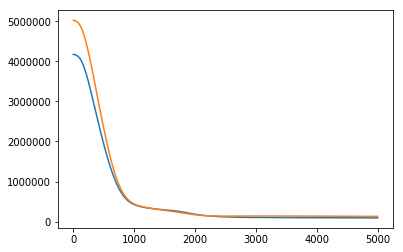

In [17]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label="Test loss")

In [26]:
from sklearn.metrics import mean_squared_error

In [19]:


#---------------        Mean Squared Error     ------------------



In [20]:
mean_squared_error(y_test, pred)

129625.04588041583

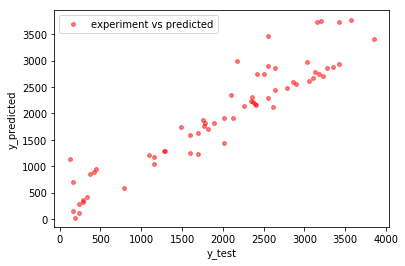

In [39]:
plt.scatter(y_test, pred, s=15, alpha=0.5, label="experiment vs predicted", color="red")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(loc='upper left')
plt.show()

In [40]:
type(y_test)

numpy.ndarray

In [69]:
len(pred)

64

In [93]:
df=pd.DataFrame({'y_test':[y_test[i][0] for i in range(len(y_test))],
                 'pred':[pred[i][0] for i in range(len(pred))]}, 
                index=[x for x in range(len(pred))])

In [94]:
df.describe()

,y_test,pred
count,64.000000,64.000000
mean,1979.789062,1966.768877
std,1061.192990,996.142724
min,122.500000,28.519741
25%,1251.250000,1221.892273
50%,2148.000000,2136.554199
75%,2808.000000,2744.015442
max,3851.000000,3774.819580


In [5]:
#----------------   SPLIT DATA FOR TRAIN AND TEST : Target is Pb ----------------

In [6]:
X_train, X_test, y_train, y_test =train_test_split(data[['GOR', 'Oil gravity', 'Gas gravity', 'T']], data.Bob)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
# reshape no matter how many col it became 1
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [8]:

#-------------- Building NN model for "Bob"  ------------------



In [9]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None,4), name='X' )
y=tf.placeholder(dtype=tf.float32, shape=(None,1), name='y' )

# setup hidden layer. data, neuron act func name
h1=tf.layers.dense(X,8, activation=tf.nn.relu, name='hidden1')

# output layer

output=tf.layers.dense(h1, 1, activation=None, name='output')

loss=tf.losses.mean_squared_error(y, output)
optimizer=tf.train.AdamOptimizer(.01)

training_run=optimizer.minimize(loss)

In [10]:
#---------- ITERATED 50 EPOCH ----------------

In [25]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

In [22]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(200):
        # training is here
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        if epoch %10==0:
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(output, feed_dict={X: X_test})

epoch 0 train loss 1.3570592 test loss 0.9398694
epoch 10 train loss 0.44882315 test loss 0.35301644
epoch 20 train loss 0.1637985 test loss 0.21467018
epoch 30 train loss 0.105786614 test loss 0.15109703
epoch 40 train loss 0.07397208 test loss 0.106520995
epoch 50 train loss 0.052358426 test loss 0.07278189
epoch 60 train loss 0.03859213 test loss 0.04937365
epoch 70 train loss 0.0248892 test loss 0.034132686
epoch 80 train loss 0.015313769 test loss 0.023541184
epoch 90 train loss 0.008950371 test loss 0.014621022
epoch 100 train loss 0.005083263 test loss 0.008550579
epoch 110 train loss 0.003323691 test loss 0.005755633
epoch 120 train loss 0.0025636305 test loss 0.0046140263
epoch 130 train loss 0.0021609946 test loss 0.0039266357
epoch 140 train loss 0.0019155208 test loss 0.0034679081
epoch 150 train loss 0.0017542266 test loss 0.0032040188
epoch 160 train loss 0.0016385063 test loss 0.0030098688
epoch 170 train loss 0.0015498569 test loss 0.0028373217
epoch 180 train loss 0.00

In [23]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.9374793667407809

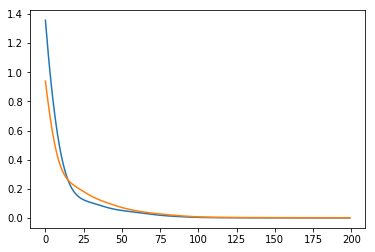

In [24]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label="Test loss")

In [27]:
mean_squared_error(y_test, pred)

0.002471637704000604

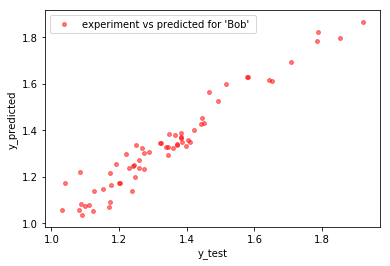

In [29]:
plt.scatter(y_test, pred, s=15, alpha=0.5, label="experiment vs predicted for 'Bob' ", color="red")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(loc='upper left')
plt.show()

In [30]:
df=pd.DataFrame({'y_test':[y_test[i][0] for i in range(len(y_test))],
                 'pred':[pred[i][0] for i in range(len(pred))]}, 
                index=[x for x in range(len(pred))])

In [31]:
df.describe()

,y_test,pred
count,64.000000,64.000000
mean,1.337141,1.334258
std,0.200401,0.202319
min,1.032000,1.033392
25%,1.198500,1.191748
50%,1.322000,1.325541
75%,1.412000,1.391444
max,1.920000,1.866014
